imports 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from pandas.api.types import CategoricalDtype
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Data loading..
data = pd.read_csv(r'Groceries_dataset.csv')

Data Exploration

In [3]:
data.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [4]:
data.shape

(38765, 3)

In [5]:
data.isnull().sum().sort_values(ascending = False)

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [7]:
data.columns

Index(['Member_number', 'Date', 'itemDescription'], dtype='object')

In [8]:
data.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


Data Preparation

In [9]:
spliting = data['Date'].str.split(pat = '-', expand = True)
data['Day'] = spliting[0]
data['Month'] = spliting[1]
data['Year'] = spliting[2]
data

,Member_number,Date,itemDescription,Day,Month,Year
0,1808,21-07-2015,tropical fruit,21,07,2015
1,2552,05-01-2015,whole milk,05,01,2015
2,2300,19-09-2015,pip fruit,19,09,2015
3,1187,12-12-2015,other vegetables,12,12,2015
4,3037,01-02-2015,whole milk,01,02,2015
...,...,...,...,...,...,...
38760,4471,08-10-2014,sliced cheese,08,10,2014
38761,2022,23-02-2014,candy,23,02,2014
38762,1097,16-04-2014,cake bar,16,04,2014
38763,1510,03-12-2014,fruit/vegetable juice,03,12,2014


In [10]:
look_up = {'01': 'Jan', '02': 'Feb', '03': 'Mar', '04': 'Apr', '05': 'May',
           '06': 'Jun', '07': 'Jul', '08': 'Aug', '09': 'Sep', '10': 'Oct', '11': 'Nov', '12': 'Dec'}

data['Month'] = data['Month'].apply(lambda x: look_up[x])

In [11]:
from datetime import datetime

date_format = '%d-%m-%Y'

# Date conversion to datetime
data['Date'] = pd.to_datetime(data['Date'], format=date_format)
data['day_of_week'] = data['Date'].dt.strftime('%A')

# weekday and weekend if else
data['weekday_weekend'] = data['day_of_week'].map(lambda x: 'weekend' if x in ['Saturday', 'Sunday'] else 'weekday')

data

,Member_number,Date,itemDescription,Day,Month,Year,day_of_week,weekday_weekend
0,1808,2015-07-21,tropical fruit,21,Jul,2015,Tuesday,weekday
1,2552,2015-01-05,whole milk,05,Jan,2015,Monday,weekday
2,2300,2015-09-19,pip fruit,19,Sep,2015,Saturday,weekend
3,1187,2015-12-12,other vegetables,12,Dec,2015,Saturday,weekend
4,3037,2015-02-01,whole milk,01,Feb,2015,Sunday,weekend
...,...,...,...,...,...,...,...,...
38760,4471,2014-10-08,sliced cheese,08,Oct,2014,Wednesday,weekday
38761,2022,2014-02-23,candy,23,Feb,2014,Sunday,weekend
38762,1097,2014-04-16,cake bar,16,Apr,2014,Wednesday,weekday
38763,1510,2014-12-03,fruit/vegetable juice,03,Dec,2014,Wednesday,weekday


Performing EDA

In [12]:
freq_items = data['itemDescription'].value_counts()
freq_items.head(10)

whole milk          2502
other vegetables    1898
rolls/buns          1716
soda                1514
yogurt              1334
root vegetables     1071
tropical fruit      1032
bottled water        933
sausage              924
citrus fruit         812
Name: itemDescription, dtype: int64

In [13]:
fig = px.bar(data_frame = freq_items.head(20), title ='Top 20 Items', text_auto ='.3s',
                 labels = {
                     "index": "Items",
                     "values": "Quantity",
                     'lift': 'Lift'
                 })
fig.update_layout(title_x = 0.5, title_y = 0.86)
fig.show()

In [14]:
frequency_of_items = data.groupby(pd.Grouper(key = 'itemDescription')).size().reset_index(name = 'count')
fig = px.treemap(frequency_of_items, path = ['itemDescription'], values = 'count')
fig.update_layout(
    title_text = 'Frequency of the Items Sold',
    title_x = 0.5, title_font = dict(size = 16),
    height = 999
)
fig.update_traces(textinfo = "label+value")
fig.show()

In [15]:
datayears = data.groupby('Year')['itemDescription'].count().reset_index() 
datayears

,Year,itemDescription
0,2014,18277
1,2015,20488


In [16]:
!pip install --upgrade matplotlib

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


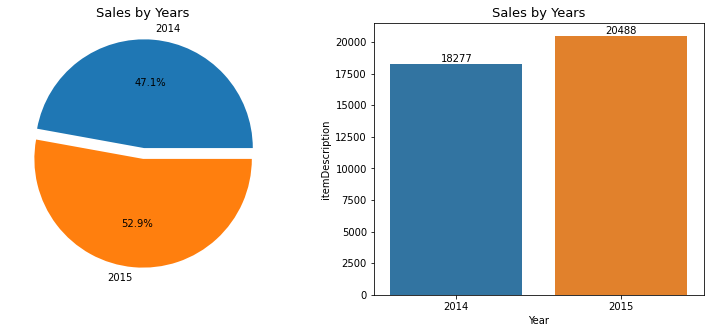

In [17]:
datayearsy = datayears['Year'].tolist()
dataitem = datayears['itemDescription'].tolist()

# Pier chart
plt.figure(figsize = (13, 5))
plt.subplot(1, 2, 1)
explode = (0.1, 0)
colors = sns.color_palette('Paired')
plt.pie(dataitem, labels = datayearsy, autopct = '%1.1f%%', explode = explode)
plt.title('Sales by Years', size = 13)

# Bar chart
plt.subplot(1, 2, 2)
ax=sns.barplot(x = 'Year', y = 'itemDescription', data = datayears)
for i in ax.containers:
    ax.bar_label(i)
plt.title('Sales by Years', size = 13)    
plt.show()

In [18]:
datamonth = data.groupby(['Month', 'Year'])['itemDescription'].count().reset_index()
datamonth.rename(columns = {'itemDescription':'Quantity'},inplace = True)
datamonth

,Month,Year,Quantity
0,Apr,2014,1561
1,Apr,2015,1699
2,Aug,2014,1575
3,Aug,2015,1921
4,Dec,2014,1473
5,Dec,2015,1536
6,Feb,2014,1437
7,Feb,2015,1560
8,Jan,2014,1527
9,Jan,2015,1797


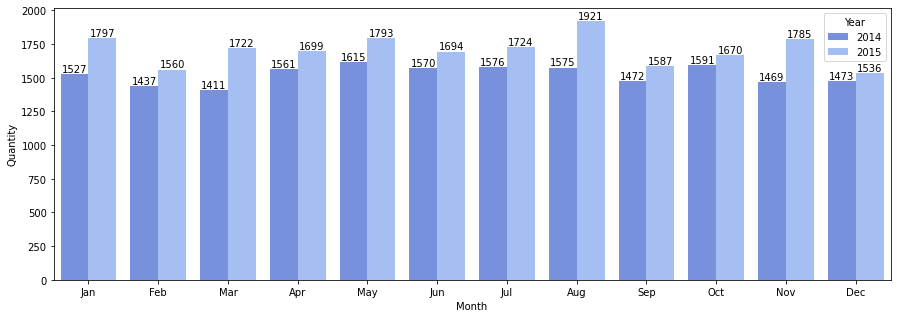

In [19]:
plt.figure(figsize = (15, 5))
from pandas.api.types import CategoricalDtype
months_ordered = CategoricalDtype(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
datamonth['Month'] = datamonth['Month'].astype(months_ordered)
datamonth = datamonth.sort_values(by = 'Month')

colors = sns.color_palette("coolwarm")
ax = sns.barplot(x = 'Month', y = 'Quantity', data = datamonth, hue = 'Year', palette = colors)
for i in ax.containers:
     ax.bar_label(i)
plt.show() 

In [20]:
dataweek = data.groupby(['day_of_week', 'Year'])['itemDescription'].count().reset_index()
dataweek.rename(columns = {'itemDescription':'Quantity'},inplace = True)
dataweek.sort_values(by = 'day_of_week')
dataweek

,day_of_week,Year,Quantity
0,Friday,2014,2560
1,Friday,2015,3002
2,Monday,2014,2593
3,Monday,2015,2789
4,Saturday,2014,2665
5,Saturday,2015,2886
6,Sunday,2014,2536
7,Sunday,2015,2994
8,Thursday,2014,2738
9,Thursday,2015,2882


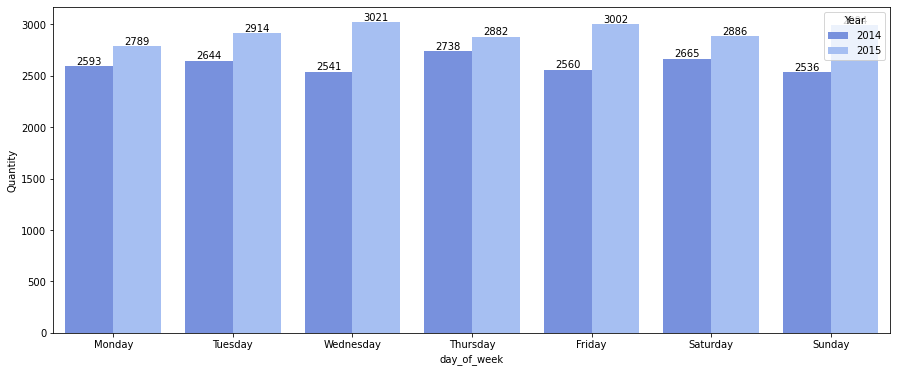

In [21]:
plt.figure(figsize = (15, 6))
from pandas.api.types import CategoricalDtype
week_ordered = CategoricalDtype(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
dataweek['day_of_week'] = dataweek['day_of_week'].astype(week_ordered)
dataweek = dataweek.sort_values(by = 'day_of_week')

colors = sns.color_palette("coolwarm")
ax = sns.barplot(x = 'day_of_week', y = 'Quantity', data = dataweek, hue = 'Year', palette = colors)
for i in ax.containers:
     ax.bar_label(i)
plt.show()  

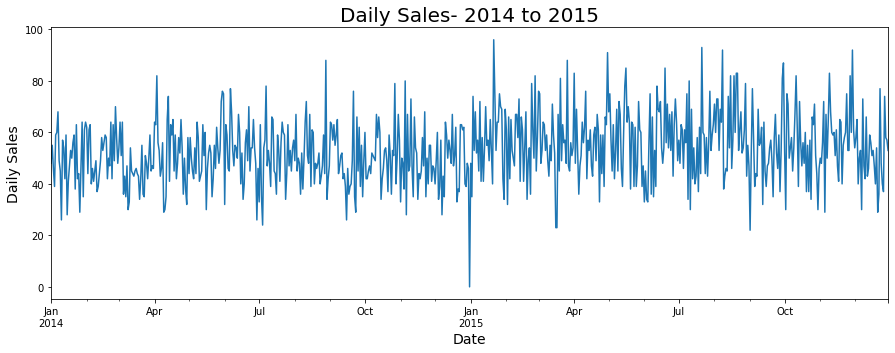

In [22]:
data.set_index('Date', inplace = True)
data.resample('D')[['itemDescription']].count().plot(kind = 'line', figsize = (15,5), legend = None)
plt.title('Daily Sales- 2014 to 2015', fontsize = 20)
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Daily Sales', fontsize = 14)
plt.show()

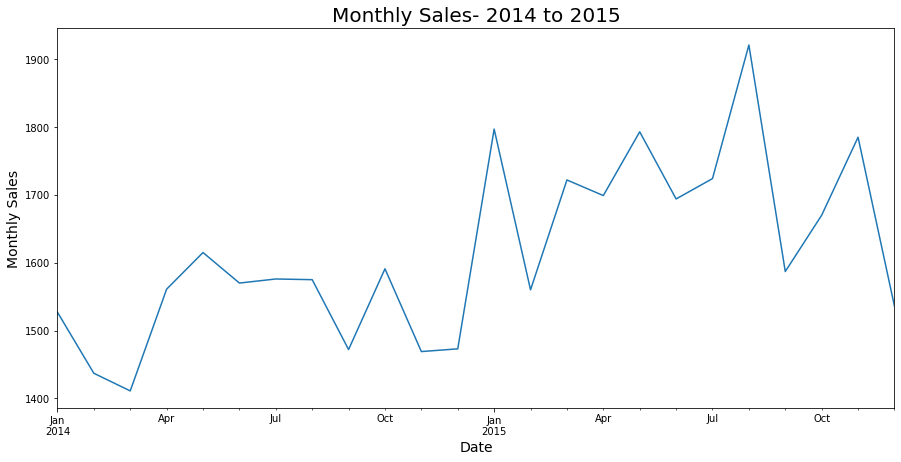

In [23]:
data.resample('M')[['itemDescription']].count().plot(kind = 'line', figsize = (15,7), legend=None )
plt.title('Monthly Sales- 2014 to 2015', fontsize = 20)
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Monthly Sales', fontsize = 14)
plt.show()

In [24]:
temp = data.groupby(['Year','Month'], as_index = False).agg(Sales = ('itemDescription', 'count'))
temp.head()

,Year,Month,Sales
0,2014,Apr,1561
1,2014,Aug,1575
2,2014,Dec,1473
3,2014,Feb,1437
4,2014,Jan,1527


In [25]:
from pandas.api.types import CategoricalDtype

months_ordered = CategoricalDtype(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
temp['Month'] = temp['Month'].astype(months_ordered)
temp = temp.sort_values(by = 'Month')
fig = px.line(temp, x= 'Month', y = 'Sales', color = 'Year')
fig.update_layout(title_text = 'Monthly Sales - 2014 to 2015', title_x = 0.5,
                 title = {'font': {'size':20}})

In [26]:
temp2 = data.groupby(['Year', 'day_of_week'], as_index = False).agg(Sales = ('itemDescription', 'count'))

order_days = CategoricalDtype(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
temp2['day_of_week'] = temp2['day_of_week'].astype(order_days)
temp2 = temp2.sort_values(by = 'day_of_week')

fig = px.line(temp2, x = 'day_of_week', y = 'Sales', color = 'Year')
fig.update_layout(title_text ='Weekday Sales - 2014 to 2015', title_x = 0.5,
                 title = {'font': {'size':20}})

In [27]:
temp3 = data.groupby(['Year','Day'], as_index = False).agg(Sales = ('itemDescription', 'count'))

fig = px.line(temp3, x = 'Day', y = 'Sales', color = 'Year')
fig.update_layout(title_text = 'Sales Per Days of the Month', title_x = 0.5,
                 title = {'font':{'size':20}})
fig.show()

Implementing Apriori Algorithm

In [28]:
basket = data.groupby(['Member_number', 'itemDescription'])['itemDescription'].count().unstack().reset_index().fillna(0).set_index('Member_number')

# Encoding the data: 0 if not purchased, 1 if purchased
def encode_units(x):
    return 1 if x >= 1 else 0

basket = basket.applymap(encode_units)

In [29]:
frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)

# Generating the association rules accordingly
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# association rules of head 15
top_rules = rules.sort_values(by='lift', ascending=False).head(15)

# Converting antecedents and consequents to strings for plotting
top_rules['antecedents'] = top_rules['antecedents'].apply(lambda x: ', '.join(list(x)))
top_rules['consequents'] = top_rules['consequents'].apply(lambda x: ', '.join(list(x)))

# Creating a table displaying the top 15 rules
top_rules_table = top_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].round(2)

# Displaying the top 15 association rules in table format
from IPython.display import display, HTML
display(HTML(top_rules_table.to_html(index=False)))

antecedents,consequents,support,confidence,lift
"yogurt, rolls/buns","sausage, other vegetables, whole milk",0.01,0.12,2.43
"sausage, other vegetables, whole milk","yogurt, rolls/buns",0.01,0.27,2.43
"yogurt, rolls/buns, other vegetables","sausage, whole milk",0.01,0.26,2.43
"sausage, whole milk","yogurt, rolls/buns, other vegetables",0.01,0.13,2.43
"yogurt, curd","sausage, whole milk",0.01,0.25,2.32
"sausage, whole milk","yogurt, curd",0.01,0.09,2.32
"yogurt, other vegetables","sausage, rolls/buns, whole milk",0.01,0.11,2.32
"sausage, rolls/buns, whole milk","yogurt, other vegetables",0.01,0.28,2.32
"sausage, rolls/buns","yogurt, other vegetables, whole milk",0.01,0.17,2.30
"yogurt, other vegetables, whole milk","sausage, rolls/buns",0.01,0.19,2.30


In [30]:
fig = px.scatter(top_rules, x='support', y='confidence', size='lift', color='lift', hover_data=['antecedents', 'consequents'],
                 title='Support vs Confidence vs Lift for Top 15 Association Rules', labels={
                     "support": "Support",
                     "confidence": "Confidence",
                     "lift": "Lift"
                 })
# note for user to hover over points
fig.add_annotation(
    text="Hover over points to see itemset information",
    xref="paper", yref="paper",
    x=0.5, y=1.05, showarrow=False,
    font=dict(size=12, color="black")
)

fig.update_layout(width=1100, height=900)
fig.update_traces(marker=dict(line=dict(width=1, color='DarkSlateGrey')))
fig.show()

# Displaying the top 15 association rules
from IPython.display import display, HTML
display(HTML(top_rules_table.to_html(index=False)))

antecedents,consequents,support,confidence,lift
"yogurt, rolls/buns","sausage, other vegetables, whole milk",0.01,0.12,2.43
"sausage, other vegetables, whole milk","yogurt, rolls/buns",0.01,0.27,2.43
"yogurt, rolls/buns, other vegetables","sausage, whole milk",0.01,0.26,2.43
"sausage, whole milk","yogurt, rolls/buns, other vegetables",0.01,0.13,2.43
"yogurt, curd","sausage, whole milk",0.01,0.25,2.32
"sausage, whole milk","yogurt, curd",0.01,0.09,2.32
"yogurt, other vegetables","sausage, rolls/buns, whole milk",0.01,0.11,2.32
"sausage, rolls/buns, whole milk","yogurt, other vegetables",0.01,0.28,2.32
"sausage, rolls/buns","yogurt, other vegetables, whole milk",0.01,0.17,2.30
"yogurt, other vegetables, whole milk","sausage, rolls/buns",0.01,0.19,2.30
